# Convolutional Neural Network (CNN) Classification
Convolutional Neural Network is a class of deep neural netowrks that are commonly applied to analyzing visual imagery. In this notebook, we are going to do a classification over the CIFAR-10 dataset using the CNN model. To do the classification, let's take one step at a time!

1. We are going to first construct the CNN model by filling out the correct dimensions of the CNN layers. The baseline CNN, whose architecture is provided below, should have around 50-60% accuracy on the test set.

2. Now that we have our baseline model, let's try to improve our model.

    a. Optimizer selection:

      Compare the following algorithms, by tuning the learning rate and parameters to obtain a better accuracy on test data.
      
        1. SGD without momentum
        2. SGD with momentum
        3. ADAM optimizer with default and tuned parameters
      
      b. Avoid Overfitting:
      Compare the weight decay and early stopping with appropriate parameters to improve the performance.


3. Data augmentation: Add rotation and translation to augment the dataset, thus improving the model's performance on accuracy.

4. Experiment with the network architecture, including the  paramaters of the convolutional layers, the pooling layers, the activational layers and the fully connected layers to see the performance change on the test set's accuracy.
            

## Load pytorch library

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
valid_ratio = 0.3

## Load the CIFAR-10 training and validation sets, and possible transforms to be applied. <font color=red>Augmentation can be done within the transform (TODO #3)</font>

The CIFAR10 dataset has 60000 32x32 colour images in 10 classes, with 6000 images per class. See
https://www.cs.toronto.edu/~kriz/cifar.html for details.

Data augmentation is a good way to enlarge the dataset so that the network trained becomes more robust and achieves better testing accuracy. Data augmentation, in short, is a way that takes a transform, such as rotation, flipping, scale, etc. to the data point to add more artificial created data points to the training set.

In this section, try to add some data augmentation on the original dataset. You can start by uncomment the augmentation below.

Helpful link for augmentation methods by PyTorch:

https://pytorch.org/docs/stable/torchvision/transforms.html

Helpful readings on augmentation: (optional)

1. https://nanonets.com/blog/data-augmentation-how-to-use-deep-learning-when-you-have-limited-data-part-2/

2. https://www.aiworkbox.com/lessons/augment-the-cifar10-dataset-using-the-randomhorizontalflip-and-randomcrop-transforms



In [2]:
from torch.utils.data import Dataset, DataLoader

class PreLoadedDataset(Dataset):
    def __init__(self,dataset,device='cuda'):
        self.shared_tensor = []
        self.shared_label = []
        for i in range(len(dataset)):
          img,label = dataset[i]
          self.shared_tensor.append(img.to(device))
          self.shared_label.append(torch.tensor(label).to(device))

    def __getitem__(self, index):
        return self.shared_tensor[index], self.shared_label[index]

    def __len__(self):
        return len(self.shared_tensor)

In [3]:
transform = transforms.Compose(
    [
     # define your data augmentation HERE. You can start by uncomment the following line
     # transforms.RandomRotation(degrees=30),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# No need to change anything below
train_valid_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
nb_train = int((1.0 - valid_ratio) * len(train_valid_dataset))
nb_valid =  int(valid_ratio * len(train_valid_dataset))
train_dataset_tv, valid_dataset_tv = torch.utils.data.dataset.random_split(train_valid_dataset, [nb_train, nb_valid])
train_dataset = PreLoadedDataset(train_dataset_tv)
valid_dataset = PreLoadedDataset(valid_dataset_tv)

trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=500,
                                          shuffle=True)
validloader = torch.utils.data.DataLoader(valid_dataset, batch_size=500,
                                          shuffle=True)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


100%|██████████| 170498071/170498071 [00:13<00:00, 12505619.43it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


## Visualize the CIFAR-10 dataset.

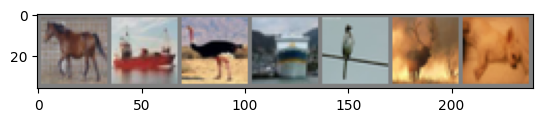

horse  ship  bird  ship  bird  deer   dog


In [4]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.cpu().numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

nclassesToVisualize = 7
# show images
imshow(torchvision.utils.make_grid(images[:nclassesToVisualize,]))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(nclassesToVisualize)))

## Modify the code below for the baseline CNN <font color=red>(TODO: #1) and modified CNN (TODO: #4)</font>
We are going to first construct the CNN model by filling out the correct dimensions of the CNN layers. Please choose the appropriate stride and padding to get the image sizes at the respective layers correct. The <font color=red>baseline CNN (TODO: #1)</font> will have the following layers:

*   **conv1:** 3x3 convolution to obtain 16 features of size 32x32
*   **RELU** activation
*   **pool:** MaxPool2d layer with a kernel size=2, stride=2 and padding=0 to obtain 16 features of size 16x16
*   **conv2:** 3x3 convolution to obtain 32 features of size 16x16
*   **RELU** activation
*   **pool: MaxPool2d** to obtain 32 features of size 8x8
*   **conv3:** 3x3 convolution to obtain 32 features of size 6x6
*   **RELU** activation
*   **linear1:** Linear layer with 512 features in the output. Choose the input feature size carefully. You should reshape the
*   **RELU** activation
*   **linear2:** Linear layer with 128 features in the output.
*   **RELU** activation
*  **linear 3:** Linear layer with appropriate # features in the output. Choose the input feature size carefully.



Our baseline CNN model has around 60% accuracy on the test set. Please copy the code below and create CNN networks with different names when you do <font color=red> To do #4</font>



In [5]:
import torch.nn as nn
import torch.nn.functional as F

# define your CNN here, e.g. activation function: F.sigmoid or F.relu

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # YOUR CODE HERE
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(32*4*4, 512)
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, 10)

        #self.out = ?

    def forward(self, x):
        # YOUR CODE HERE
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = F.relu(self.conv3(x))
        x = self.pool(x)
        x = x.view(-1, 32*4*4) # reshape to a vector
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x



## Instantiate the CNN and print out the number of parameters

In [6]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net = Net().to(device)
print(net)
print("Total number of trainable CNN parameters=",sum([p.numel() for p in net.parameters()]))

Net(
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=512, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)
Total number of trainable CNN parameters= 343946


## Define the loss function and the optimizer. <font color=red>(TODO: #2)</font>
Adam and SGD are two optimizers that are majorly used in deep learning netowrk design. Adam has a good performance in terms of good convergence speed and good accuracy.
However, Adam in some cases has a worse validation loss than SGD, in other words, Adam though converges fast, may not converge to the optimal minimum as good as SGD does.

Your task in this section is to try the Adam and SGD optimizers and find a proper LR so that you have a better performance on accuracy.

Helpful link for determining a good learning rate for Adam and SGD optimizer:

https://medium.com/octavian-ai/which-optimizer-and-learning-rate-should-i-use-for-deep-learning-5acb418f9b2

Helpful readings on Adam and SGD: (optional)

1. https://towardsdatascience.com/adam-latest-trends-in-deep-learning-optimization-6be9a291375c
    
2. https://shaoanlu.wordpress.com/2017/05/29/sgd-all-which-one-is-the-best-optimizer-dogs-vs-cats-toy-experiment/



In [15]:
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

criterion = nn.CrossEntropyLoss()

# TO DO: Define your optimizer: Start with SGD and try more sophisticatd optimizers in Todo #2
#optimizer = optim.SGD(net.parameters(),lr = 1,momentum=0.9)
optimizer = optim.Adam(net.parameters(),lr = 1e-2)

## Define the path to store the trained CNN parameters (optional)

In [16]:
PATH = 'mnist_net.pth'


## Train the CNN and store the best model based on the validation loss <font color=red>(TODO: #2.b)<font>
Training the neural network model too many epochs end up with high variance between training set and testing set, which also called an overfitting problem. Different strategies like L1 and L2 regularization, dropout and early stopping can be used to prevent the model from overfitting.

The idea behind early stopping is that when the generalization error increases, stop training the model to prevent overfitting problem. Note that early stopping strategy in some degree is the same as L2 regularization so it's an alternative to L2 regularization. More will be discussed in the lecture.

Your task in this section is to come up with a python implementation of an early stopping strategy to avoid overfitting.

Helpful readings for the early stopping strategy and other techniques to prevent overfitting problems.

1. https://machinelearningmastery.com/early-stopping-to-avoid-overtraining-neural-network-models/

2. https://towardsdatascience.com/preventing-deep-neural-network-from-overfitting-953458db800a



In [23]:
import time

# define an empty list called validation_loss that might be helpful later in the early stopping implementation
validation_loss = []

start_time = time.time()
best_loss = float('inf')
for epoch in range(50):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
      # Training data
      #--------------
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + update parameters
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
    epoch_loss = running_loss / (i+1)
    print("Epoch: ", epoch, " train loss: ", '%.3f' % epoch_loss)

    # Validation
    #------------
    with torch.no_grad():
      running_loss = 0.0
      for i, data in enumerate(validloader, 0):
          # get the inputs; data is a list of [inputs, labels]
          inputs, labels = data[0].to(device), data[1].to(device)

          # forward
          outputs = net(inputs)
          loss = criterion(outputs, labels)

          # print statistics
          running_loss += loss.item()
      epoch_loss = running_loss / (i+1)

      # add epoch_loss at each iteration to the validation_loss list which is later used in the early stopping implementation
      validation_loss.append(epoch_loss)

      print("Epoch: ", epoch, " validation loss: ", '%.3f' % epoch_loss)
      # save the best model based on validation loss
      if epoch_loss < best_loss:
        # torch.save(net.state_dict(), PATH)
        best_loss = epoch_loss

      # Early stopping implementation goes below: (TODO)
      running_avg_loss = np.mean(validation_loss[-10:])
      if running_avg_loss <= epoch_loss and epoch > 10: #forcing training to occur for atleast 10 epochs
        print("Stopping Early")
        break

time_elap = (time.time() - start_time) // 60
print('Finished Training in %d mins' % time_elap)

Epoch:  0  train loss:  1.002
Epoch:  0  validation loss:  1.278
Epoch:  1  train loss:  0.986
Epoch:  1  validation loss:  1.302
Epoch:  2  train loss:  0.957
Epoch:  2  validation loss:  1.331
Epoch:  3  train loss:  0.947
Epoch:  3  validation loss:  1.359
Epoch:  4  train loss:  0.950
Epoch:  4  validation loss:  1.345
Epoch:  5  train loss:  0.927
Epoch:  5  validation loss:  1.332
Epoch:  6  train loss:  0.925
Epoch:  6  validation loss:  1.336
Epoch:  7  train loss:  0.907
Epoch:  7  validation loss:  1.374
Epoch:  8  train loss:  0.889
Epoch:  8  validation loss:  1.385
Epoch:  9  train loss:  0.897
Epoch:  9  validation loss:  1.370
Epoch:  10  train loss:  0.862
Epoch:  10  validation loss:  1.415
Epoch:  11  train loss:  0.882
Epoch:  11  validation loss:  1.392
Stopping Early
Finished Training in 0 mins


## Define the test dataset

In [24]:
transform = transforms.Compose(
     [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False)

Files already downloaded and verified


## Visualize the test dataset

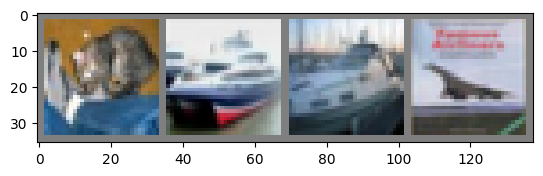

GroundTruth:    cat  ship  ship plane


In [25]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

## Load the learned CNN parameters. This is required when you have trained the CNN and do no want to train it again by loading the learned parameters. (optional)

In [20]:
# net.load_state_dict(torch.load(PATH))

## Get the predictions for the first 4 images in the test dataset

In [26]:
with torch.no_grad():
  outputs = net(images.to(device))
  _, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat   car  ship plane


## Infer on the whole test dataset

In [27]:
testloader = torch.utils.data.DataLoader(testset, batch_size=200,
                                         shuffle=False)
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images.to(device))
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels.to(device)).sum().item()

print('Accuracy of the network on the 10000 test images: %.3F %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 54.620 %
